***Assignment 1_Data Analytics***

**Balanced Risk Set Matching: A Method for Observational Studies**

- Laurenz Mesiah A. Palanas
- Emily Rose Escartin

<br>

\begin{gather}
\Large \textbf{Introduction}
\end{gather}



The research paper titled **"Balanced Risk Set Matching"** by **Yunfei Paul Li, Kathleen J. Propert, and Paul R. Rosenbaum,** published in the *Journal of the American Statistical Association*, introduces a new form of risk set matching for observational studies where treatment is assigned based on patient symptoms over time. The study evaluates the effect of cystoscopy and hydrodistention (a treatment) on patient symptoms. This method is being applied to an observational study on Interstitial Cystitis (IC), a chronic bladder condition.





<br>


\begin{gather}
\Large \textbf{Methodology}
\end{gather}



### 1. **Risk Set Matching**: 
- When a patient **receives the treatment at time \( t \)**, they are matched with another patient who:
  - Has a **similar history of symptoms** up to time \( t \).
  - **Has not received the treatment** before time \( t \).
- This ensures comparability between treated and control patients.


<br>

### 2. **Balancing Covariates**:
   - The treatment and control groups should have **balanced distributions** of key covariates (e.g., symptom severity, age, etc.).
   - This is achieved through **integer programming**, which ensures **matching at the group level** in addition to individual pairwise similarity.



<br>

### 3. **Optimization**:
   - Among all possible balanced matches, the method selects the one that minimizes **multivariate pretreatment covariate distance** within matched pairs.
   - Uses **Mahalanobis distance** to measure similarity.
   - Integer programming is applied to select the **best match**.
   - The matching process minimizes the distance within each matched pair while ensuring balance.



<br>



### 4. **Sensitivity Analysis**:
   - A **sensitivity analysis** is performed to check whether the results **hold under possible bias**.
   - Hidden biases may exist if some **unobserved factors** influence both treatment assignment and outcomes.

   -  One approach is **Rosenbaum’s Sensitivity Analysis**, which evaluates how different levels of hidden bias (\(\Gamma\)) impact the p-value of the Wilcoxon test.  

      1. Assume an **unmeasured confounder** affects treatment assignment.  

      2. Compute **Wilcoxon test p-values** for different levels of bias ($\Gamma = 1.0, 1.1, 1.2, ...$).  

      3. If the p-value remains **significant even for large $\Gamma$**, results are **robust to hidden bias**.  

      4. If p-values **lose significance for small $\Gamma$**, the study is highly **sensitive to confounding**.  


<br>


<br>

\begin{gather}
\Large \textbf{Statistical Techniques }
\end{gather}



In the **observational study on Interstitial Cystitis (IC)**, several advanced statistical techniques are applied to ensure valid causal inference despite the lack of randomization. Below is an in-depth explanation of each technique and its role in the study.  

<br>

### **1. Integer Programming for Optimal Pairing**  

- Ensure each treated patient is matched to the most similar untreated patient while maintaining balance in symptom distributions.
- Minimize the total Mahalanobis distance across all matched pairs.


   #### ***Mathematical Formulation***:

   The problem is formulated as a **linear programming** optimization:  

   $$
   \min \sum_{(i,j) \in P} d_M(x_i, x_j) \cdot m_{ij}
   $$

   where:  
   - $P$ is the set of all possible treated-control patient pairs.  
   - $ d_M(x_i, x_j)$  is the **Mahalanobis distance** between patient \( i \) (treated) and patient \( j \) (control).  
   - $ m_{ij} $ is a **binary decision variable**:  

   $$
   m_{ij} =
   \begin{cases} 
   1, & \text{if treated patient } i \text{ is matched with control } j \\
   0, & \text{otherwise}
   \end{cases}
   $$

   **Constraints**:  
   1. Each treated patient is matched to exactly **one** control:  
         $$
         \sum_{j} m_{ij} = 1, \quad \forall i \in \text{treated}
         $$
   2. Each control patient is matched at most **once**:  
         $$
         \sum_{i} m_{ij} \leq 1, \quad \forall j \in \text{control}
         $$

3. **Balance constraints** (ensuring distributions of symptoms remain similar across groups).  

<br>

### **2. Wilcoxon Signed-Rank Test for Outcome Comparison**  

- Since the study is observational, the **symptom scores** of treated and matched control patients are not necessarily normally distributed.  
- A **parametric t-test** would require the assumption of normality, which is often invalid in small, skewed datasets.  
- Instead, the **Wilcoxon Signed-Rank Test**, a **non-parametric test**, is used to compare pre-matched and post-matched patient symptoms.  

#### ***Mathematical Formulation***: 

For each symptom category (Pain, Urgency, Frequency), we define **paired differences**:  

$$
d_i = X_{\text{treated}, i} - X_{\text{control}, i}
$$

where:  
- $ X_{\text{treated}, i} $ is the post-treatment symptom score of a treated patient.  
- $ X_{\text{control}, i} $ is the post-treatment symptom score of their matched control.  

The test statistic is computed as:

$$
W = \sum R^+ - \frac{n(n+1)}{4}
$$

where:  
- $ R^+ $ is the sum of ranks for positive differences $ d_i $.  
- $ n $ is the number of matched pairs.  

A **low p-value** (< 0.05) suggests a significant difference between the two groups, meaning the treatment likely had an effect.  

<br>

### **3. Mahalanobis Distance for Similarity Measurement**  

- Ensures that matched pairs are **statistically similar** before treatment.  
- Measures how well the control patient **resembles** the treated patient in baseline symptoms.  

#### ***Mathematical Formulation***:  
Mahalanobis distance measures the distance between two points while accounting for **correlations among variables**:

$$
D_M(x_i, x_j) = \sqrt{(x_i - x_j)^T \Sigma^{-1} (x_i - x_j)}
$$

where:  
- $ x_i, x_j $ are the **baseline feature vectors** (Pain, Urgency, Frequency) of the treated and control patients.  
- $ \Sigma^{-1} $ is the **inverse covariance matrix** of the dataset.  


<br>

### **4. Sensitivity Analysis to Assess Robustness**  

- **Observational studies are vulnerable to hidden biases** (confounders that were not measured).  
- Sensitivity analysis assesses **how strong an unmeasured confounder would have to be** to change the study’s conclusions.  
  
One approach is **Rosenbaum’s Sensitivity Analysis**, which evaluates how different levels of hidden bias ($\Gamma$) impact the p-value of the Wilcoxon test.  

1. Assume an **unmeasured confounder** affects treatment assignment.  
2. Compute **Wilcoxon test p-values** for different levels of bias ($\Gamma = 1.0, 1.1, 1.2, ...$).  
3. If the p-value remains **significant even for large $\Gamma$**, results are **robust to hidden bias**.  
4. If p-values **lose significance for small $\Gamma$**, the study is highly **sensitive to confounding**.  





\begin{gather}
\Large \textbf{Python Implementation}
\end{gather}


### **Steps in the Code**:

**Step 1: Import Necessary Libraries**: Load essential libraries for data manipulation, visualization, and statistical analysis.




In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.spatial.distance import mahalanobis
from scipy.stats import wilcoxon
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment

**Step 2: Generate Synthetic Dataset**: 

- Create a dataset with 100 treated and 200 control patients.

- Simulate symptoms like Pain, Urgency, and Frequency.

In [83]:
np.random.seed(42)
n_treated = 100
n_controls = 200
n_patients = n_treated + n_controls

# Generate symptom data
base_pain = np.random.normal(loc=5, scale=2, size=n_patients).clip(0, 9)
base_urgency = np.random.normal(loc=5, scale=1.5, size=n_patients).clip(0, 9)
base_frequency = np.random.normal(loc=3, scale=1, size=n_patients).clip(0, 9)


**Step 3: Define Treated and Control Groups**: 


- The treated group has progressively worsening symptoms.

- The control group maintains consistent symptoms.

In [84]:

def simulate_outcomes(base_value, treatment_effect, decay_rate):
    return (
        np.clip(base_value - treatment_effect + np.random.normal(0, 1, len(base_value)), 0, 9),
        np.clip(base_value - (treatment_effect * decay_rate) + np.random.normal(0, 1, len(base_value)), 0, 9)
    )

# Treated group with worsening symptoms over time
treated = pd.DataFrame({
    'id': np.arange(n_treated),
    'is_treated': True,
    'baseline_pain': base_pain[:n_treated],
    'baseline_urgency': base_urgency[:n_treated],
    'baseline_frequency': base_frequency[:n_treated],
    'pain_at_t': (base_pain[:n_treated] + np.random.normal(1, 0.5, n_treated)).clip(0, 9),
    'urgency_at_t': (base_urgency[:n_treated] + np.random.normal(1, 0.5, n_treated)).clip(0, 9),
    'frequency_at_t': (base_frequency[:n_treated] + np.random.normal(1, 0.5, n_treated)).clip(0, 9),
})

# Apply simulated post-treatment effects
treated['pain_3mo'], treated['pain_6mo'] = simulate_outcomes(treated['pain_at_t'], 1, 0.8)
treated['urgency_3mo'], treated['urgency_6mo'] = simulate_outcomes(treated['urgency_at_t'], 1, 0.8)
treated['frequency_3mo'], treated['frequency_6mo'] = simulate_outcomes(treated['frequency_at_t'], 1, 0.8)

# Control group with stable symptoms
controls = pd.DataFrame({
    'id': np.arange(n_treated, n_patients),
    'is_treated': False,
    'baseline_pain': base_pain[n_treated:],
    'baseline_urgency': base_urgency[n_treated:],
    'baseline_frequency': base_frequency[n_treated:],
    'pain_at_t': (base_pain[n_treated:] + np.random.normal(0, 0.3, n_controls)).clip(0, 9),
    'urgency_at_t': (base_urgency[n_treated:] + np.random.normal(0, 0.3, n_controls)).clip(0, 9),
    'frequency_at_t': (base_frequency[n_treated:] + np.random.normal(0, 0.3, n_controls)).clip(0, 9),
})

# Add stability over time for control group (no major treatment effects)
controls['pain_3mo'], controls['pain_6mo'] = simulate_outcomes(controls['pain_at_t'], 0, 1.0)
controls['urgency_3mo'], controls['urgency_6mo'] = simulate_outcomes(controls['urgency_at_t'], 0, 1.0)
controls['frequency_3mo'], controls['frequency_6mo'] = simulate_outcomes(controls['frequency_at_t'], 0, 1.0)



**Step 4: Calculate Mahalanobis Distance**: 

- Normalize symptom scores and compute the Mahalanobis Distance.

In [85]:
def compute_mahalanobis(treated_df, control_df):
    features = ['baseline_pain', 'baseline_urgency', 'baseline_frequency']
    
    # Normalize data
    scaler = StandardScaler()
    combined_data = scaler.fit_transform(pd.concat([treated_df[features], control_df[features]]))
    treated_scaled = combined_data[:len(treated_df)]
    control_scaled = combined_data[len(treated_df):]

    # Compute covariance matrix
    cov_matrix = np.cov(combined_data, rowvar=False)
    if cov_matrix.ndim == 0:
        cov_matrix = np.array([[cov_matrix]])
    elif cov_matrix.ndim == 1:
        cov_matrix = np.diag(cov_matrix)

    # Ensure positive-definiteness
    if np.linalg.matrix_rank(cov_matrix) < cov_matrix.shape[0]:
        cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-6

    # Compute inverse covariance matrix
    inv_cov_matrix = np.linalg.pinv(cov_matrix)

    # Calculate Mahalanobis distances
    distances = cdist(treated_scaled, control_scaled, metric='mahalanobis', VI=inv_cov_matrix)
    
    return distances

# Compute Mahalanobis distance matrix
distance_matrix = compute_mahalanobis(treated, controls)

# Convert to DataFrame and round values
distance_df = pd.DataFrame(distance_matrix).round(3)

# Improve column names
distance_df.columns = [f"Control {i + 1}" for i in range(distance_df.shape[1])]
distance_df.index = [f"Treated {i + 1}" for i in range(distance_df.shape[0])]

# Display formatted output
print("🔹 Mahalanobis Distance Matrix (First 5 Rows)")
print(distance_df.head().to_string(index=True))

🔹 Mahalanobis Distance Matrix (First 5 Rows)
           Control 1  Control 2  Control 3  Control 4  Control 5  Control 6  Control 7  Control 8  Control 9  Control 10  Control 11  Control 12  Control 13  Control 14  Control 15  Control 16  Control 17  Control 18  Control 19  Control 20  Control 21  Control 22  Control 23  Control 24  Control 25  Control 26  Control 27  Control 28  Control 29  Control 30  Control 31  Control 32  Control 33  Control 34  Control 35  Control 36  Control 37  Control 38  Control 39  Control 40  Control 41  Control 42  Control 43  Control 44  Control 45  Control 46  Control 47  Control 48  Control 49  Control 50  Control 51  Control 52  Control 53  Control 54  Control 55  Control 56  Control 57  Control 58  Control 59  Control 60  Control 61  Control 62  Control 63  Control 64  Control 65  Control 66  Control 67  Control 68  Control 69  Control 70  Control 71  Control 72  Control 73  Control 74  Control 75  Control 76  Control 77  Control 78  Control 79  Contr

**Step 5: Perform Optimal Pair Matching**: 

- Utilize the Hungarian algorithm for optimal pairing.

In [87]:
def match_patients(distance_matrix, treated, controls):
    row_ind, col_ind = linear_sum_assignment(distance_matrix)

    matched_pairs = []
    for t_idx, c_idx in zip(row_ind, col_ind):
        matched_pairs.append({
            'Treated_ID': treated.iloc[t_idx]['id'],
            'Control_ID': controls.iloc[c_idx]['id'],
            'Distance': distance_matrix[t_idx, c_idx]  # Store the distance
        })

    return pd.DataFrame(matched_pairs)

print("\n🔹 Step 5: Matched Pairs (First 10 Rows)")
print(matched_df.head(10))  # Show first 10 matched pairs


🔹 Step 5: Matched Pairs (First 10 Rows)
   Treated_ID  Control_ID  Distance
0           0         186  0.208440
1           1         168  0.316257
2           2         200  0.360489
3           3         167  0.612660
4           4         190  0.226008
5           5         107  0.517286
6           6         252  0.481127
7           7         175  0.481779
8           8         230  0.519011
9           9         298  0.474533


**Step 6: Compute Risk Set Matching**: 

- Evaluate risk differences for matched pairs.


In [91]:


def risk_set_matching():
    risk_scores = []
    for treated_id, control_id in matches:
        treated_baseline = treated.loc[treated_id, ['baseline_pain', 'baseline_urgency', 'baseline_frequency']]
        control_baseline = controls.loc[control_id, ['baseline_pain', 'baseline_urgency', 'baseline_frequency']]
        
        # Calculate risk score as mean of baseline symptoms
        treated_risk = treated_baseline.mean()
        control_risk = control_baseline.mean()
        
        risk_scores.append({
            'treated_id': treated_id,
            'control_id': control_id,
            'treated_risk': treated_risk,
            'control_risk': control_risk,
            'risk_difference': abs(treated_risk - control_risk)
        })
    return pd.DataFrame(risk_scores)

risk_set_df = risk_set_matching()
print("Average risk difference between matched pairs:", risk_set_df['risk_difference'].mean())



Average risk difference between matched pairs: 1.0499242133662299


**Step 7: Wilcoxon Test for Bias Analysis**: 
- Assess differences in matched pairs using Wilcoxon Signed-Rank Test.

In [ ]:
for var in ['pain_at_t', 'urgency_at_t', 'frequency_at_t']:
    treated_outcomes = [treated.loc[treated_id, var] for treated_id, _ in matches]
    control_outcomes = [controls.loc[control_id, var] for _, control_id in matches]
    wilcoxon_stat, p_value = wilcoxon(
        treated_outcomes, control_outcomes, alternative='two-sided'
    )
    print(f"Wilcoxon test for {var}: statistic={wilcoxon_stat}, p-value={p_value}")


Wilcoxon test for pain_at_t: statistic=608.0, p-value=0.7813934753886187
Wilcoxon test for urgency_at_t: statistic=330.0, p-value=0.002525686043762576
Wilcoxon test for frequency_at_t: statistic=263.0, p-value=0.0001858580190070569


**Step 8: Visualizing Symptom Trends**: 


- Use boxplots to illustrate symptom distributions before and after matching.


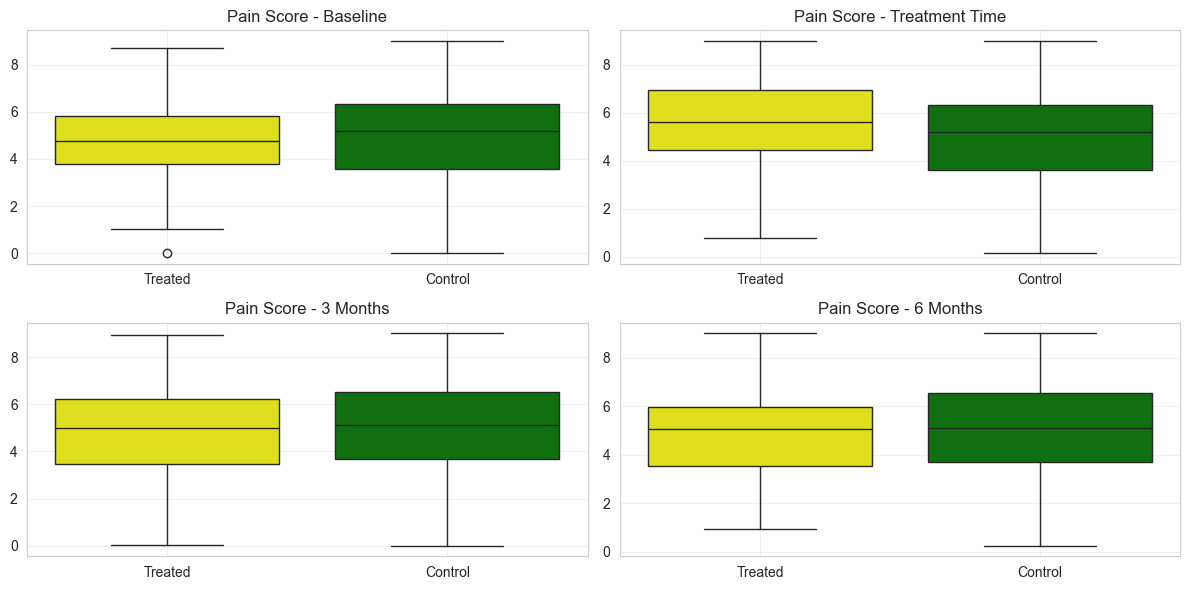

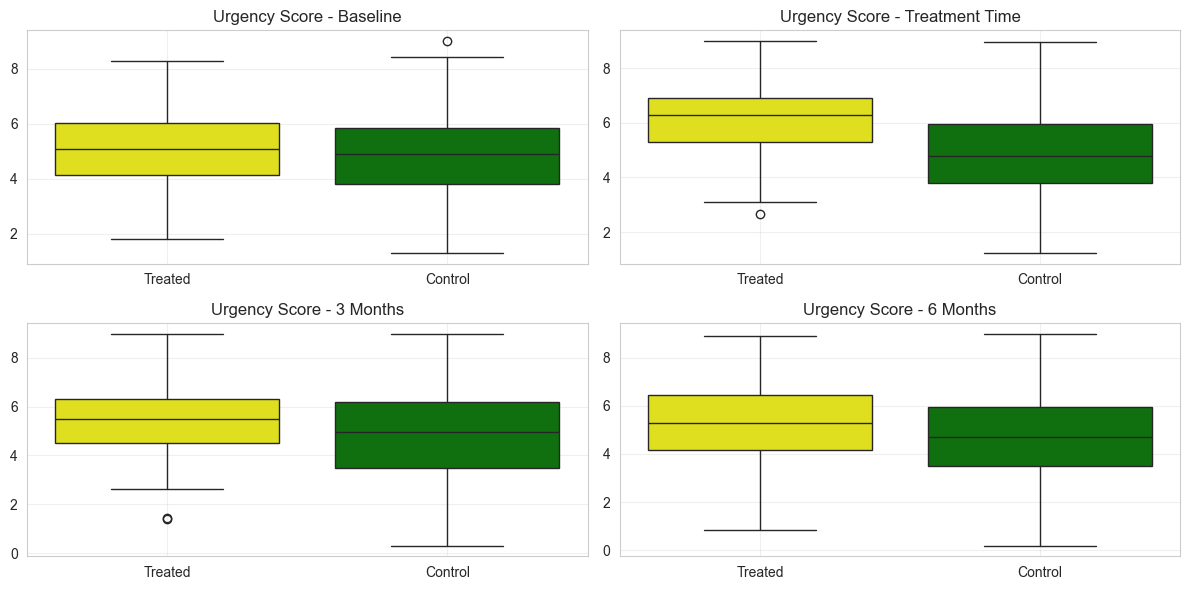

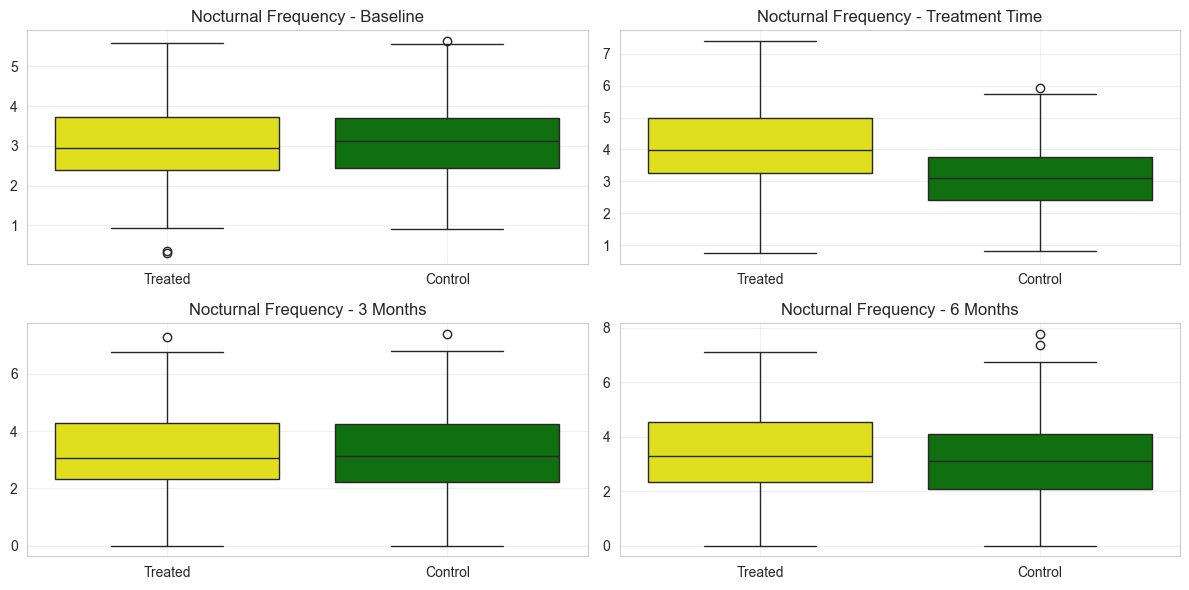

In [97]:

def create_variable_plots(variable, axis_labels):
    plt.figure(figsize=(12, 6))
    
    timepoints = ['baseline', 'at_t', '3mo', '6mo']
    labels = ['Baseline', 'Treatment Time', '3 Months', '6 Months']

    timepoint_columns = [
        f'baseline_{variable}', f'{variable}_at_t',
        f'{variable}_3mo', f'{variable}_6mo'
    ]

    for col in timepoint_columns:
        if col not in treated.columns or col not in controls.columns:
            print(f"Warning: {col} is missing from data.")
            return
    
    treated_values = [treated[col].values for col in timepoint_columns]
    control_values = [controls[col].values for col in timepoint_columns]

    for i in range(4):
        plt.subplot(2, 2, i+1)
        sns.boxplot(data=[treated_values[i], control_values[i]], palette=["yellow", "green"])
        plt.xticks([0, 1], ["Treated", "Control"])
        plt.title(f"{axis_labels} - {labels[i]}")
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

create_variable_plots('pain', 'Pain Score')
create_variable_plots('urgency', 'Urgency Score')
create_variable_plots('frequency', 'Nocturnal Frequency')

**Step 9: Visualizing Line Plots as Symptoms over Time**: 

- We generate line plots to track symptom progression over different time points. The plots display the mean symptom scores for the treated and control groups, with shaded confidence intervals representing variability. 
- This visualizes the effect of treatment over time and compare trends between the groups.


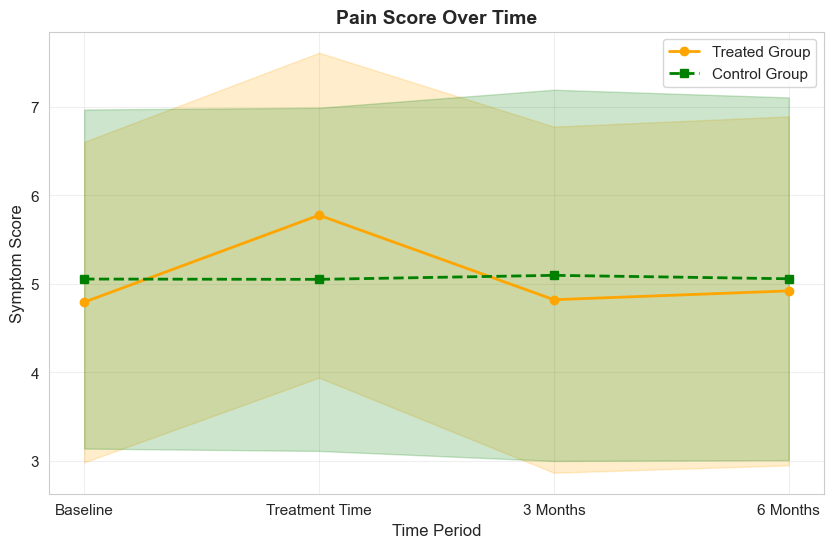

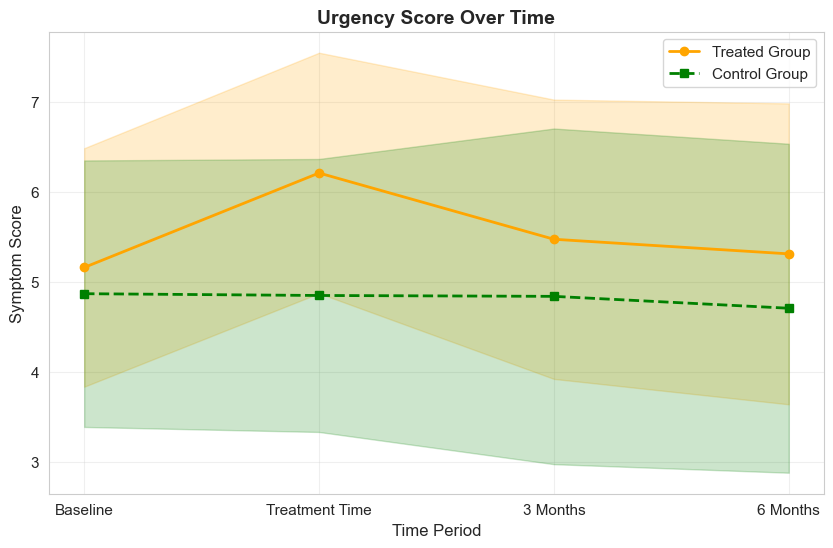

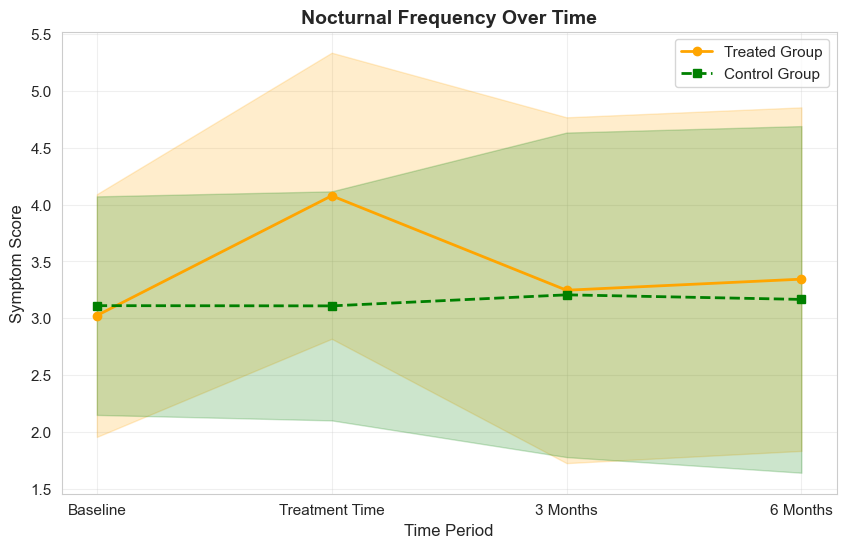

In [111]:


def plot_variable_trends(variable, axis_labels):
    plt.figure(figsize=(10, 6))

    # Correct column naming based on your dataset
    column_mapping = {
        'pain': ['baseline_pain', 'pain_at_t', 'pain_3mo', 'pain_6mo'],
        'urgency': ['baseline_urgency', 'urgency_at_t', 'urgency_3mo', 'urgency_6mo'],
        'frequency': ['baseline_frequency', 'frequency_at_t', 'frequency_3mo', 'frequency_6mo']
    }
    
    if variable not in column_mapping:
        print(f"Warning: {variable} is not recognized.")
        return
    
    time_labels = ["Baseline", "Treatment Time", "3 Months", "6 Months"]
    timepoint_columns = column_mapping[variable]

    # Check for missing data
    missing_columns = [col for col in timepoint_columns if col not in treated.columns or col not in controls.columns]
    if missing_columns:
        print(f"Warning: Missing columns {missing_columns} from data.")
        return

    # Compute means and standard deviations
    treated_means = [treated[col].mean() for col in timepoint_columns]
    control_means = [controls[col].mean() for col in timepoint_columns]

    treated_stds = [treated[col].std() for col in timepoint_columns]
    control_stds = [controls[col].std() for col in timepoint_columns]

    # Plot mean values with confidence intervals
    plt.plot(time_labels, treated_means, marker='o', linestyle='-', color='orange', label="Treated Group", linewidth=2)
    plt.fill_between(time_labels, np.array(treated_means) - np.array(treated_stds),
                     np.array(treated_means) + np.array(treated_stds), color='orange', alpha=0.2)

    plt.plot(time_labels, control_means, marker='s', linestyle='--', color='green', label="Control Group", linewidth=2)
    plt.fill_between(time_labels, np.array(control_means) - np.array(control_stds),
                     np.array(control_means) + np.array(control_stds), color='green', alpha=0.2)

    # Titles & Styling
    plt.title(f"{axis_labels} Over Time", fontsize=14, fontweight='bold')
    plt.xlabel("Time Period", fontsize=12)
    plt.ylabel("Symptom Score", fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(alpha=0.3)
    plt.legend(loc="upper right", fontsize=11)

    plt.show()

# Generate plots for all symptoms
plot_variable_trends('pain', 'Pain Score')
plot_variable_trends('urgency', 'Urgency Score')
plot_variable_trends('frequency', 'Nocturnal Frequency')